# Imports


In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier
)

# Loading dataset


In [2]:
file_path = r"./ObesityPred.csv"
df = pd.read_csv(file_path)

print(df.head())

   Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62    64.0                            yes   no   2.0  3.0   
1  Female   21    1.52    56.0                            yes   no   3.0  3.0   
2    Male   23    1.80    77.0                            yes   no   2.0  3.0   
3    Male   27    1.80    87.0                             no   no   3.0  3.0   
4    Male   22    1.78    89.8                             no   no   2.0  1.0   

        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0  Sometimes    no   2.0   no  0.0  1.0          no  Public_Transportation   
1  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2  Sometimes    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3  Sometimes    no   2.0   no  2.0  0.0  Frequently                Walking   
4  Sometimes    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Wei

# Encoding the categorical features

In [3]:
label_encoders = {}  # using label encoder as the data has few unique values

for col in df.select_dtypes(include=['object']).columns: # checking if the column has an "object" : categorical data
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]) # Convert categorical values to numeric labels
    label_encoders[col] = le  

print(df.head())

   Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0   21    1.62    64.0                               1     0   2.0   
1       0   21    1.52    56.0                               1     0   3.0   
2       1   23    1.80    77.0                               1     0   2.0   
3       1   27    1.80    87.0                               0     0   3.0   
4       1   22    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  


# Correlation matrix

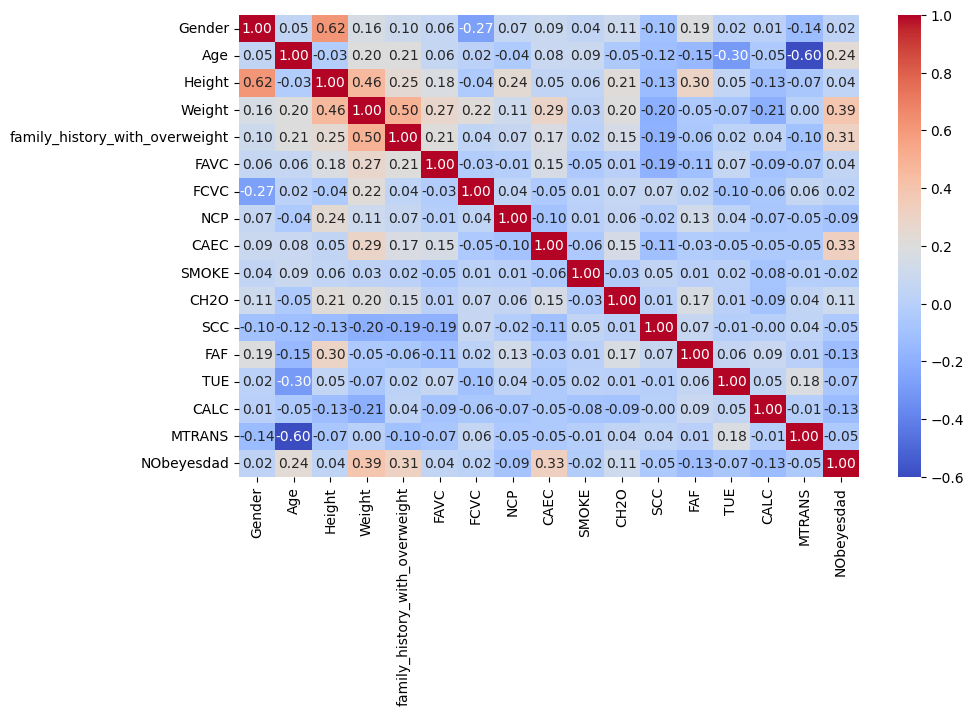

In [4]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# Feature Engineering 


In [5]:
# dropping some features based on the correlation matrix
df = df.drop(columns=['TUE', 'CALC', 'MTRANS' , 'FAF']) 

# adding new feature
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

print(df.head())

   Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0   21    1.62    64.0                               1     0   2.0   
1       0   21    1.52    56.0                               1     0   3.0   
2       1   23    1.80    77.0                               1     0   2.0   
3       1   27    1.80    87.0                               0     0   3.0   
4       1   22    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  NObeyesdad        BMI  
0  3.0     2      0   2.0    0           1  24.386526  
1  3.0     2      1   3.0    1           1  24.238227  
2  3.0     2      0   2.0    0           1  23.765432  
3  3.0     2      0   2.0    0           5  26.851852  
4  1.0     2      0   2.0    0           6  28.342381  


# Separate features (X) and target (y)

In [6]:
X = df.drop(columns=["NObeyesdad"])  # Features
y = df["NObeyesdad"]  # Target label

# Splitting the data

In [7]:
# Train-Test-Validation Split (60% Train, 20% Validation, 20% Test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Decision Tree Classifier

In [8]:
# Create and train Decision Tree
dt_classifier = DecisionTreeClassifier(
    criterion='gini',           # Can also use 'entropy', but gini is faster
    max_depth=10,              # Limit tree depth to prevent overfitting
    min_samples_split=5,       # Minimum samples required to split
    min_samples_leaf=2,        # Minimum samples in leaf node
    random_state=42
)

# Note: Decision Trees don't require normalized data, but we'll use it for consistency
dt_classifier.fit(X_train, y_train)

# Make predictions
dt_train_pred = dt_classifier.predict(X_train)
dt_val_pred = dt_classifier.predict(X_val)
dt_test_pred = dt_classifier.predict(X_test)

print("=== Decision Tree Performance ===")
print(f"Training Accuracy: {accuracy_score(y_train, dt_train_pred):.4f}")
print(f"Validation Accuracy: {accuracy_score(y_val, dt_val_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, dt_test_pred):.4f}")

print(f"\nTest Set Metrics:")
print(f"Precision: {precision_score(y_test, dt_test_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, dt_test_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, dt_test_pred, average='weighted'):.4f}")

=== Decision Tree Performance ===
Training Accuracy: 0.9921
Validation Accuracy: 0.9668
Test Accuracy: 0.9574

Test Set Metrics:
Precision: 0.9596
Recall: 0.9574
F1-Score: 0.9574


# Visualizing Tree


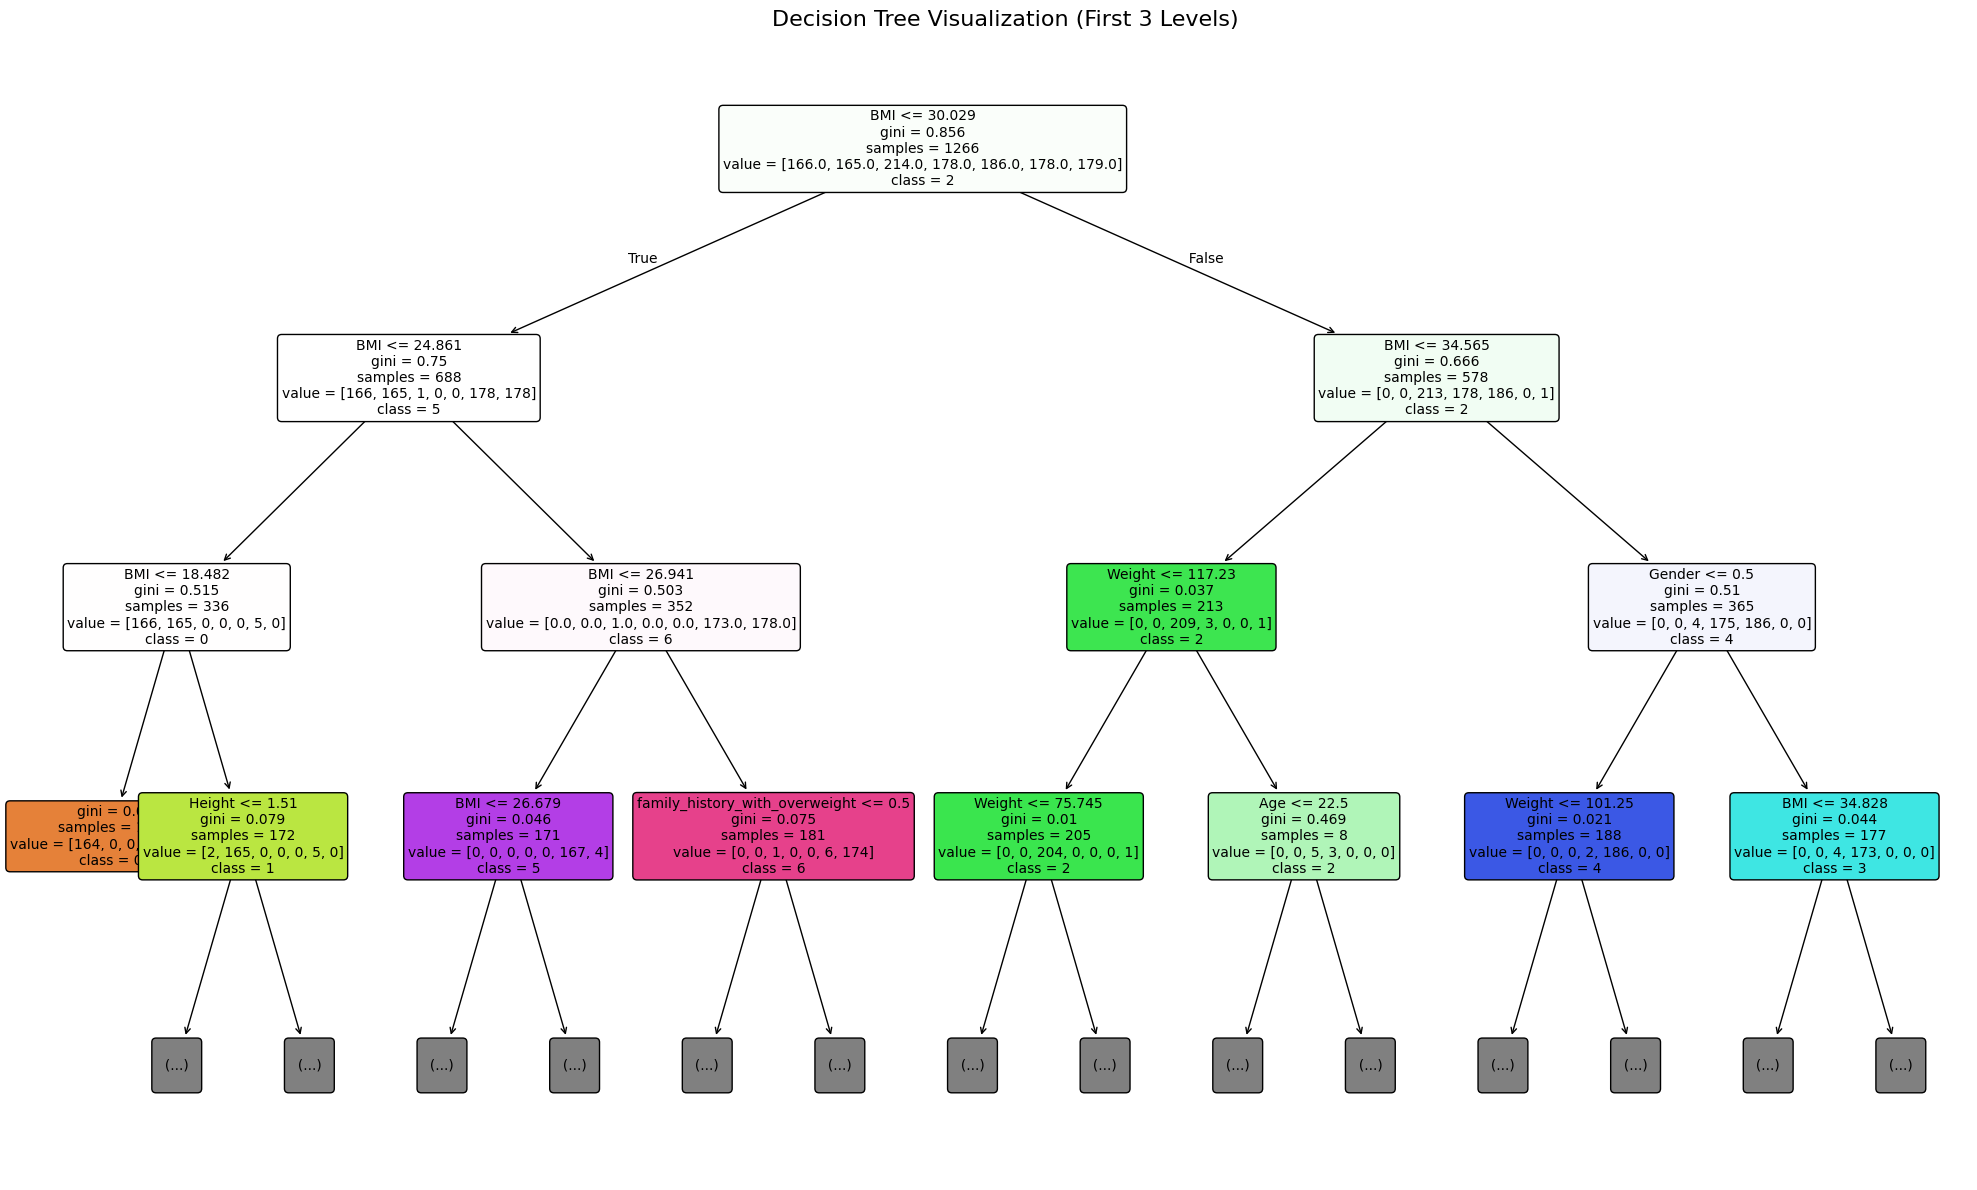

Tree depth: 9
Number of nodes: 63
Number of leaves: 32
Feature names: ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'BMI']


In [9]:
# Get feature names from the original DataFrame
feature_names = X.columns.tolist()

# Visualize the Decision Tree (simplified version)
plt.figure(figsize=(20, 12))
plot_tree(dt_classifier, 
          feature_names=feature_names,
          class_names=[str(c) for c in np.unique(y)],
          filled=True, 
          rounded=True,
          max_depth=3,  # Show only first 3 levels for readability
          fontsize=10)
plt.title('Decision Tree Visualization (First 3 Levels)', fontsize=16)
plt.tight_layout()
plt.show()

print(f"Tree depth: {dt_classifier.tree_.max_depth}")
print(f"Number of nodes: {dt_classifier.tree_.node_count}")
print(f"Number of leaves: {dt_classifier.tree_.n_leaves}")
print(f"Feature names: {feature_names}")

# Bagging 


In [10]:
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    random_state=42
)
bag_clf.fit(X_train, y_train)
print("Bagging OOB score:", bag_clf.oob_score_)
print("Bagging accuracy:", accuracy_score(y_test, bag_clf.predict(X_test)))


Bagging OOB score: 0.9747235387045814
Bagging accuracy: 0.9621749408983451


# Random Forest

Random Forest OOB score: 0.990521327014218
Random Forest accuracy: 0.983451536643026


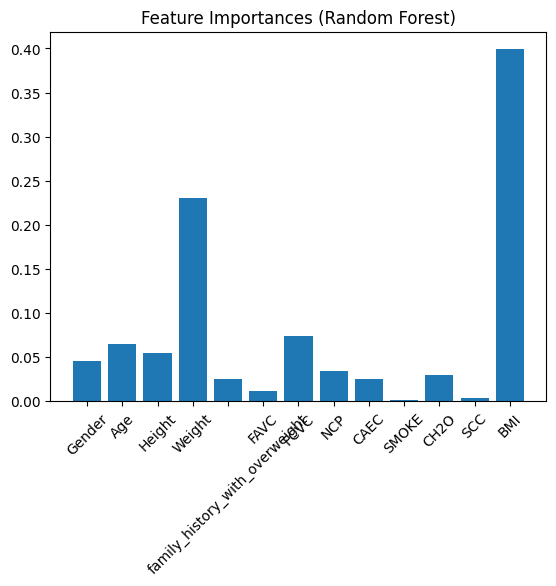

In [11]:
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',
    oob_score=True,
    n_jobs=-1,
    random_state=42
)
rf_clf.fit(X_train, y_train)
print("Random Forest OOB score:", rf_clf.oob_score_)
print("Random Forest accuracy:", accuracy_score(y_test, rf_clf.predict(X_test)))

importances = rf_clf.feature_importances_
plt.bar(X.columns, importances)
plt.xticks(rotation=45)
plt.title("Feature Importances (Random Forest)")
plt.show()

# AdaBoost


AdaBoost accuracy: 0.9432624113475178


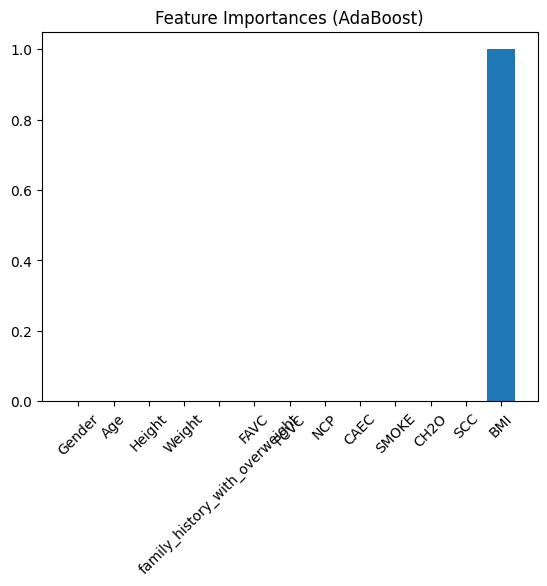

In [ ]:
stump = DecisionTreeClassifier(max_depth=1, random_state=42)

ada_clf = AdaBoostClassifier(
    estimator=stump,
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

ada_clf.fit(X_train, y_train)

print("AdaBoost accuracy:", accuracy_score(y_test, ada_clf.predict(X_test)))

importances = ada_clf.feature_importances_
plt.bar(X.columns, importances)
plt.xticks(rotation=45)
plt.title("Feature Importances (AdaBoost)")
plt.show()